In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

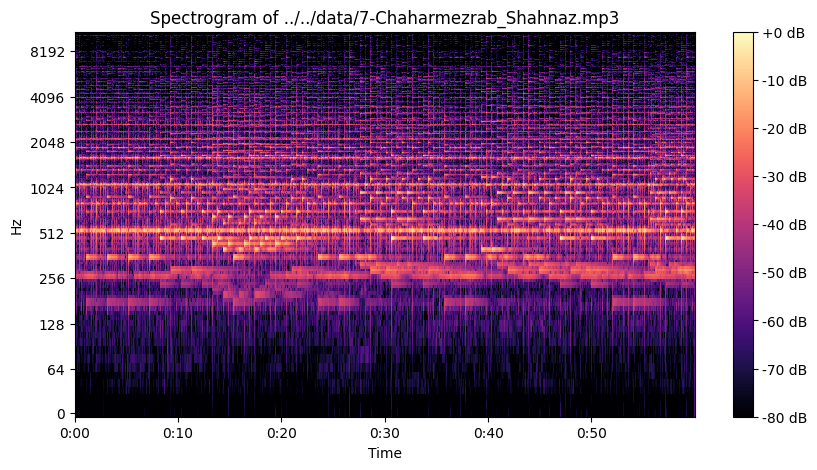

In [82]:
# Load the audio file using librosa
file_path = "../../data/7-Chaharmezrab_Shahnaz.mp3"
duration = 60
sample_rate = None

y, sr = librosa.load(file_path, duration=duration)

# Generate the spectrogram
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

# Display the spectrogram
plt.figure(figsize=(10, 5))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of ' + file_path)

plt.show()

In [4]:
sr / 25

882.0

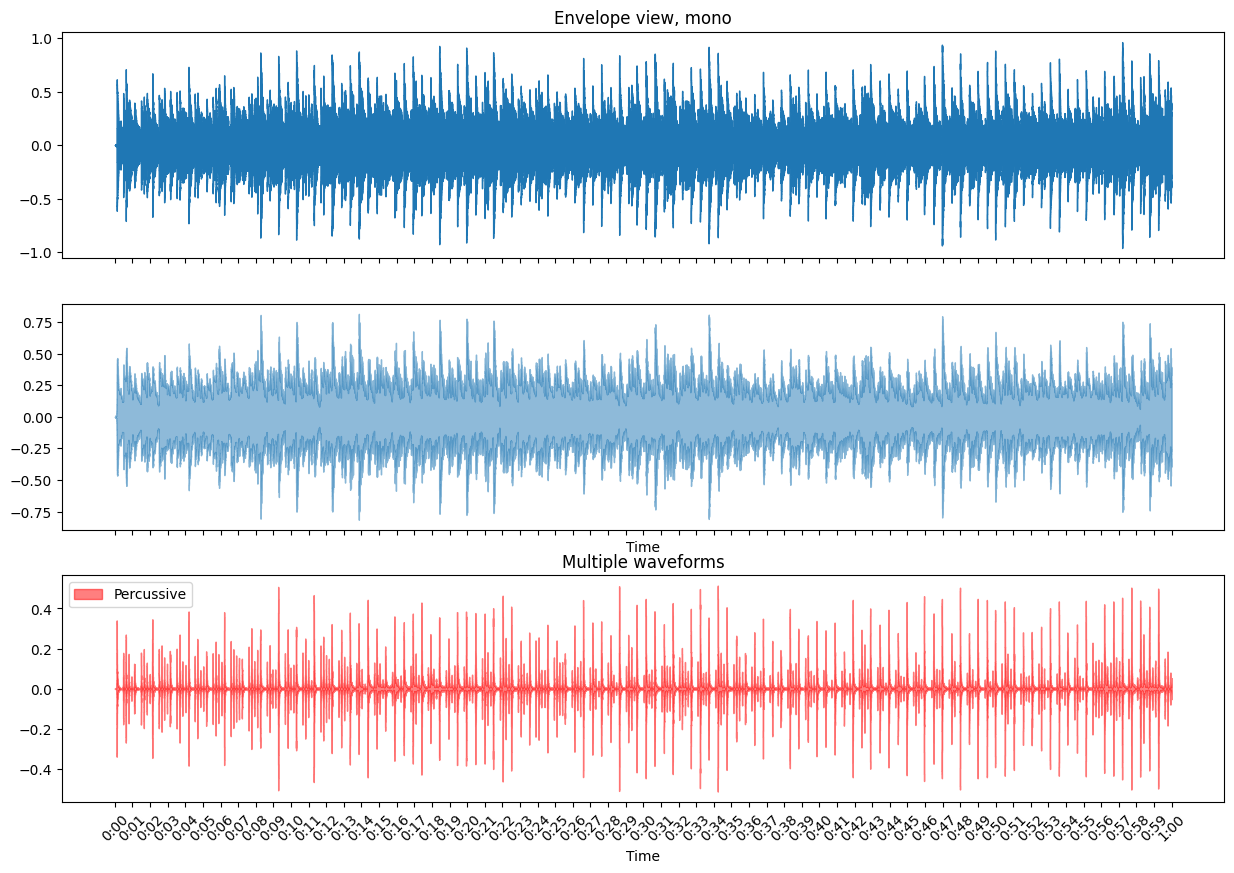

In [88]:
y, sr = librosa.load(file_path, duration=duration)
fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(15, 10))
librosa.display.waveshow(y, sr=sr, ax=ax[0])
ax[0].set(title='Envelope view, mono')
ax[0].label_outer()

y, sr = librosa.load(file_path, duration=duration)
y_harm, y_perc = librosa.effects.hpss(y)
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax[1], label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax[2], label='Percussive')

# Increase the detail on the x-axis
x_ticks = np.arange(0, duration + 1, 1)  # Adjust this for finer or coarser ticks (1 second intervals)
ax[2].set_xticks(x_ticks)

# Rotate x-axis labels
plt.xticks(rotation=45)

ax[2].set(title='Multiple waveforms')
ax[2].legend()

In [96]:
len(y_perc) / 3600

367.5

1323000


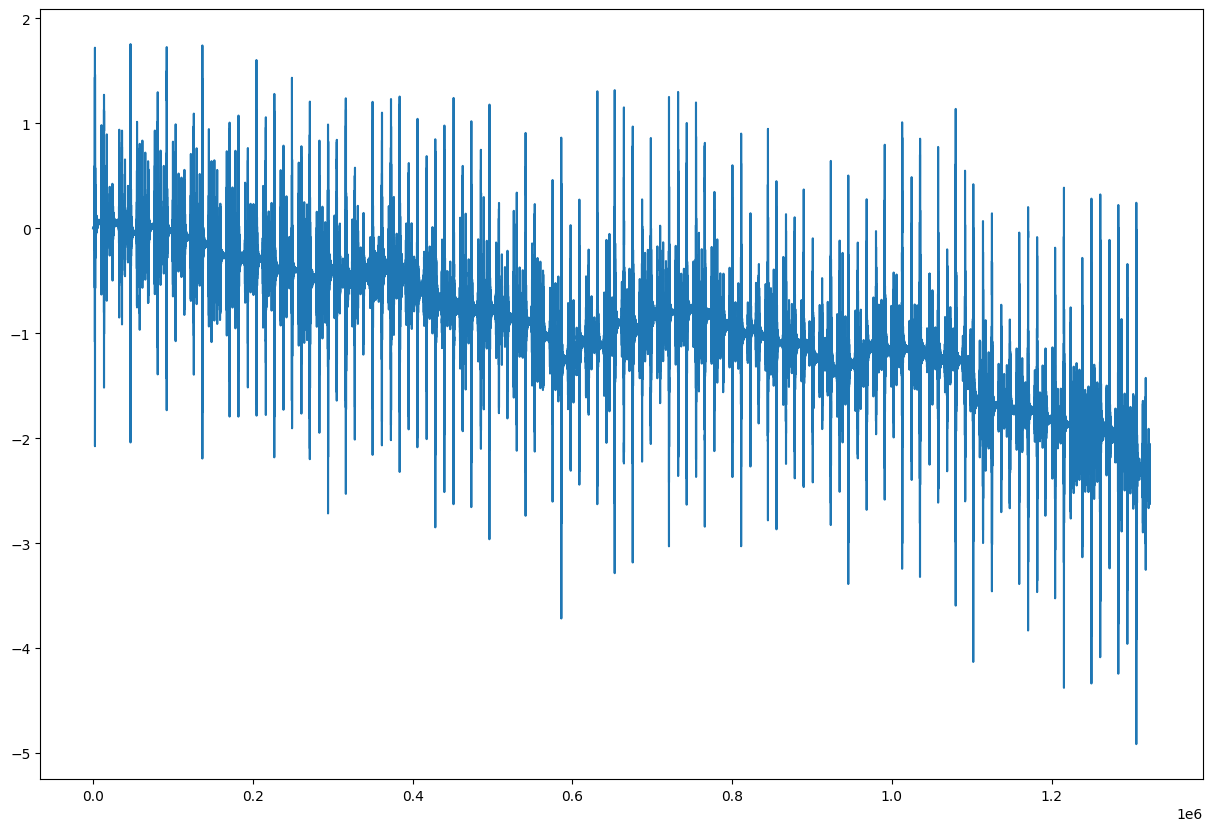

In [106]:
fig, ax = plt.subplots(figsize=(15, 10))
# Precompute exponential decay factors
decay_factors = np.exp(-np.arange(3600)/25)

# Initialize y_perc_echo and the extended y_perc array
y_perc_echo = []
y_perc_pre = np.concatenate([np.zeros(3600), y_perc])

# Initial echo sum (for k = 3600)
echo_sum = np.dot(y_perc_pre[:3600], decay_factors)

# Append the first echo sum
y_perc_echo.append(echo_sum)

# Use a sliding window to compute subsequent echo sums
for k in range(3601, len(y_perc_pre)):
    if y_perc_pre[k] > y_perc_echo[k - 3600]:
        
    y_perc_echo.append(echo_sum)

print(len(y_perc_echo))
plt.plot(y_perc_echo)

In [107]:
decay_factors

array([1.00000000e+00, 9.60789439e-01, 9.23116346e-01, ...,
       3.26369784e-63, 3.13572642e-63, 3.01277282e-63])